<h2 ><b>Bengaluru House Price Prediction Model</b></h2>
<h3><p>Introduction</p></h3>
The Bengaluru housing market has seen significant growth and diversification over the years, driven by the city’s rapid urbanization and booming tech industry. Accurately predicting house prices in this dynamic market can be a valuable tool for buyers, sellers, and real estate professionals. This notebook outlines the development of a machine learning model aimed at predicting house prices in Bengaluru based on various features.

<h3>Importing Libraries</h3>

In this section, we will import the essential libraries required for data manipulation, analysis, and visualization. 
- Pandas: A powerful library for data manipulation and analysis, providing data structures like DataFrames to work with structured data.
- NumPy: A fundamental package for numerical computing in Python, offering support for arrays and a variety of mathematical functions.
- Matplotlib: A widely-used library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library built on top of Matplotlib, which provides a high-level interface for drawing attractive and informative graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

<h2>Importing Scikit-Learn Libraries</h2>
<p>
    In this section, we import key modules from the Scikit-Learn library that are essential for model evaluation and validation:
</p>
<ul>
    <li><strong>train_test_split</strong>: A function to split the dataset into training and testing subsets, ensuring that the model can be evaluated on unseen data.</li>
    <li><strong>accuracy_score</strong>: A metric to assess the performance of classification models by calculating the ratio of correct predictions to total predictions.</li>
    <li><strong>mean_squared_error</strong>: A metric for regression models that quantifies the average squared difference between predicted and actual values, providing insight into prediction accuracy.</li>
    <li><strong>r2_score</strong>: A statistical measure that indicates the proportion of variance in the dependent variable that can be explained by the independent variables in the model.</li>
    <li><strong>ShuffleSplit</strong>: A cross-validation technique that randomly splits the dataset into training and testing sets multiple times, allowing for robust model evaluation.</li>
    <li><strong>cross_val_score</strong>: A utility that evaluates a model’s performance by performing cross-validation, helping to ensure the model generalizes well to new data.</li>
</ul>


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('bengaluru_house_prices.csv')
print("Size of Data : ",df.shape)
df.head()

Size of Data :  (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<!-- Data Cleaning and Importing Section -->

<h2>Data Cleaning and Importing</h2>
<p>
    In this section, we will focus on importing the dataset and performing necessary cleaning operations to prepare the data for analysis. Proper data cleaning is essential to ensure the accuracy and reliability of our predictive model.
</p>
<p>
    The main steps involved in this process include:
</p>
<ul>
    <li><strong>Importing the Dataset</strong>: Loading the data into a Pandas DataFrame for easy manipulation and analysis.</li>
    <li><strong>Handling Missing Values</strong>: Identifying and addressing any missing or null values in the dataset, either by removing them or imputing appropriate values.</li>
    <li><strong>Removing Duplicates</strong>: Checking for and eliminating any duplicate records to ensure each entry is unique.</li>
    <li><strong>Data Type Conversion</strong>: Ensuring that each column in the dataset has the correct data type for accurate processing and analysis.</li>
    <li><strong>Feature Scaling</strong>: Normalizing or standardizing numerical features to improve the performance of machine learning algorithms.</li>
</ul>
<p>
    By carefully cleaning and preparing the data, we can enhance the model's predictive capabilities and achieve more reliable results.
</p>


In [5]:
# remove non-usefull columns
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# finding null values and removing it
print(df1.isnull().sum())
print("===================================")
print("Before Removing NA values",df1.shape)
df2 = df1.dropna()
print("===================================")
print("After Removing NA values",df2.shape)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64
Before Removing NA values (13320, 5)
After Removing NA values (13246, 5)


In [7]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))
df2.head()

C:\Users\dsnar\AppData\Local\Temp\ipykernel_6444\2597355081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [8]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    else:
        return True

In [9]:
df[~df['total_sqft'].apply(isfloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [10]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [11]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


<!-- Feature Engineering Section -->

<h2>Feature Engineering</h2>
<p>
    Feature engineering is a crucial step in the data preparation process that involves creating new features or modifying existing ones to improve the model's predictive performance. In this section, we will focus on the techniques used to enhance our dataset for the Bengaluru house price prediction model.
</p>
<p>
    Key activities in feature engineering include:
</p>
<ul>
    <li><strong>Creating New Features</strong>: Developing additional features based on existing data, such as calculating the price per square foot or categorizing locations into broader regions.</li>
    <li><strong>Encoding Categorical Variables</strong>: Converting categorical data into numerical format using techniques like one-hot encoding or label encoding to make it suitable for machine learning algorithms.</li>
    <li><strong>Feature Selection</strong>: Identifying and selecting the most relevant features that contribute to the model's performance, potentially using techniques like correlation analysis or feature importance scores.</li>
    <li><strong>Handling Outliers</strong>: Detecting and addressing outliers that could skew the model's predictions, either by removing them or applying transformations.</li>
</ul>
<p>
    Effective feature engineering can lead to improved model accuracy and better insights from the data, ultimately enhancing the overall performance of the prediction model.
</p>


In [12]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [13]:
df4.location = df4.location.apply(lambda x:x.strip())
location_states = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_states

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [14]:
location_states_lessthen_10 = location_states[location_states<=10]
df4.location = df4.location.apply(lambda x: 'other' if x in location_states_lessthen_10 else x)
len(df4.location.unique())

242

<!-- Outlier Detection Section -->

<h2>Outlier Detection</h2>
<p>
    Outlier detection is an essential part of data preprocessing that helps identify and manage anomalous data points that deviate significantly from the rest of the dataset. In the context of our Bengaluru house price prediction model, addressing outliers is crucial for improving the model's accuracy and reliability.
</p>
<p>
    Key aspects of outlier detection include:
</p>
<ul>
    <li><strong>Identifying Outliers</strong>: Using statistical methods and visualization techniques, such as box plots and scatter plots, to detect data points that fall outside the expected range.</li>
    <li><strong>Statistical Methods</strong>: Applying techniques like Z-score or the Interquartile Range (IQR) method to quantify and flag outliers based on their distance from the mean or median.</li>
    <li><strong>Impact Analysis</strong>: Evaluating the influence of identified outliers on the overall model performance to determine whether they should be retained, transformed, or removed.</li>
    <li><strong>Treatment of Outliers</strong>: Deciding on the appropriate course of action for outliers, which may include removal, capping, or transformation to mitigate their impact on model training.</li>
</ul>
<p>
    By effectively detecting and handling outliers, we can enhance the robustness of our predictive model, leading to more accurate predictions and better insights from the data.
</p>


In [15]:
print(df4.shape)
df4[(df4.total_sqft/df4.bhk < 300)].head()

(13246, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [16]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [17]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

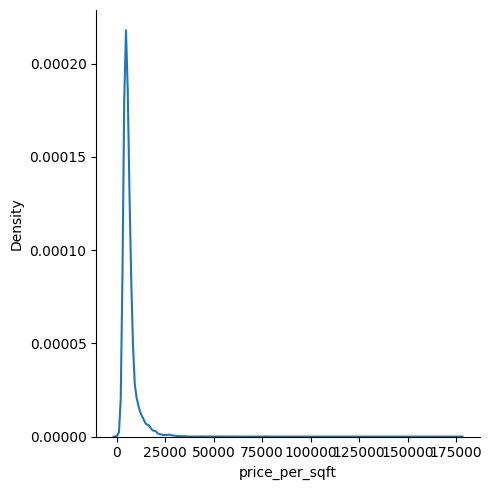

In [18]:
import seaborn as sns

sns.displot(df5, x="price_per_sqft", kind='kde')

<Axes: xlabel='price_per_sqft'>

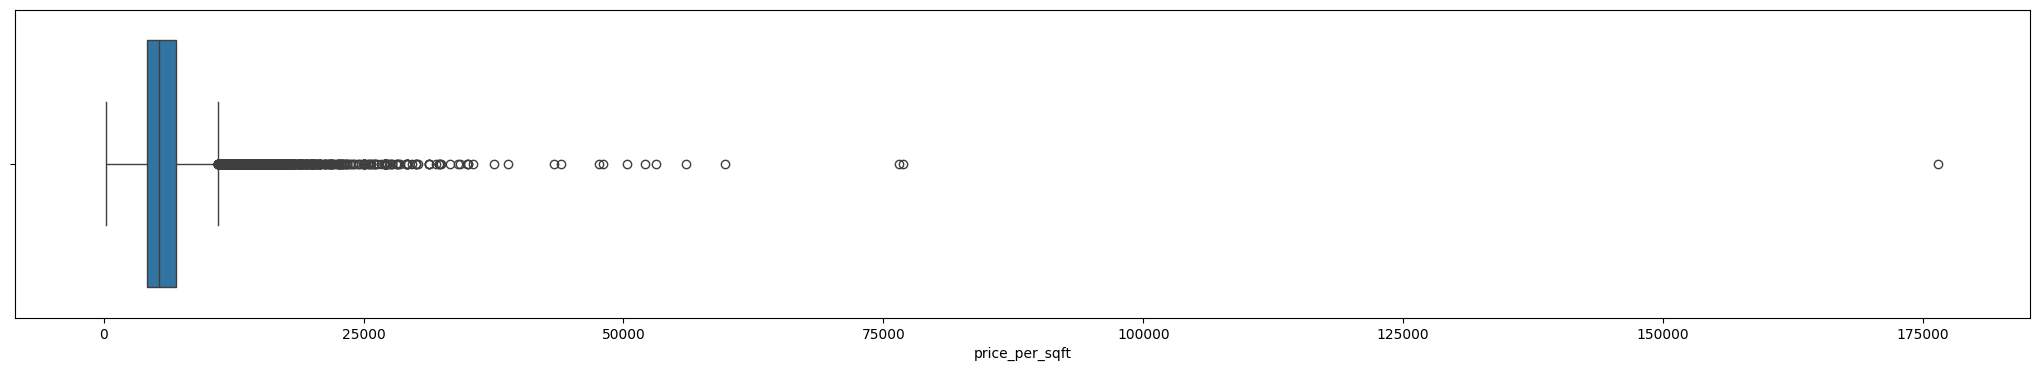

In [19]:
plt.figure(figsize=(26,4))
sns.boxplot(x = df5['price_per_sqft'])

In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-st))& (sub_df.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [21]:
# sns.displot(data=df6,x='price_per_sqft',kind='kde')
# sns.boxplot(data=df6,x='price_per_sqft')
df6.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

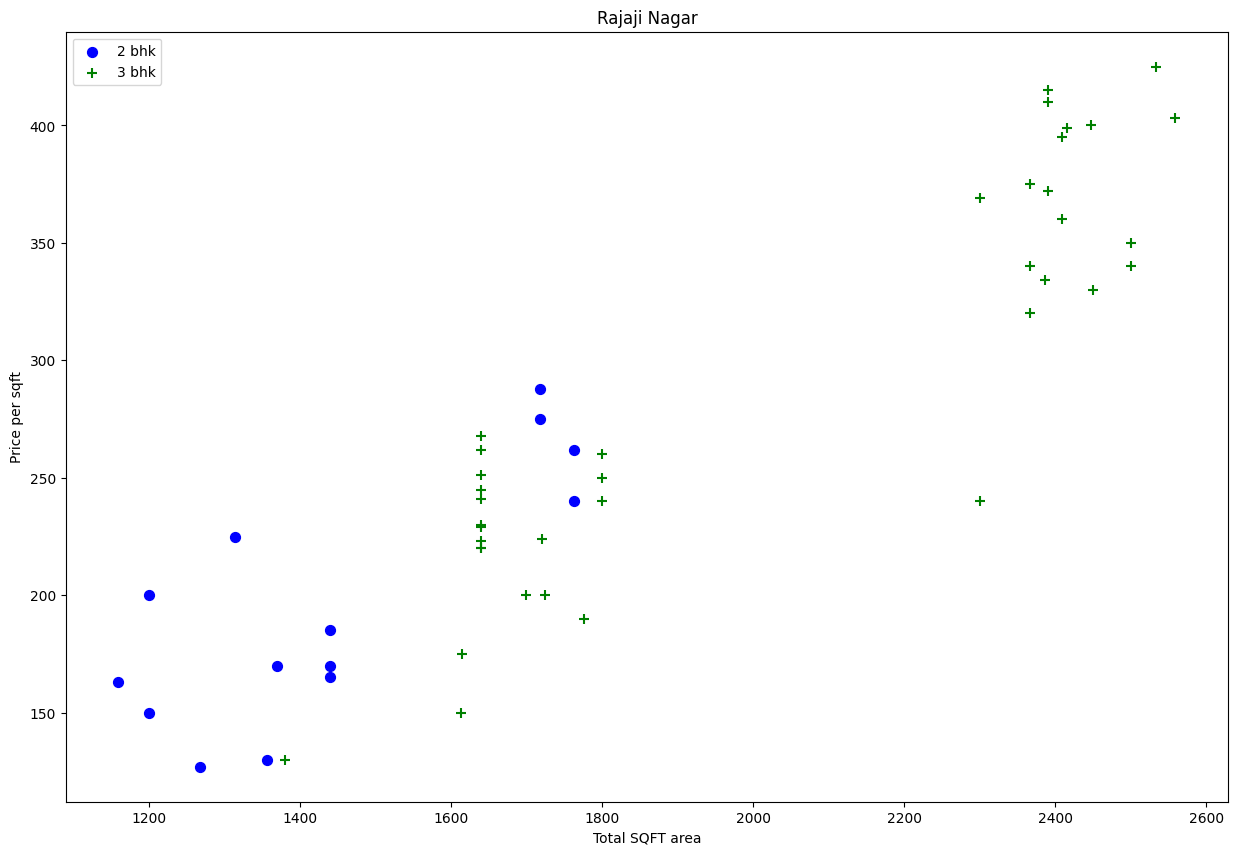

In [22]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 bhk', s=50)
    plt.xlabel("Total SQFT area")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6, 'Rajaji Nagar')

##### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

`{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}`
##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [23]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

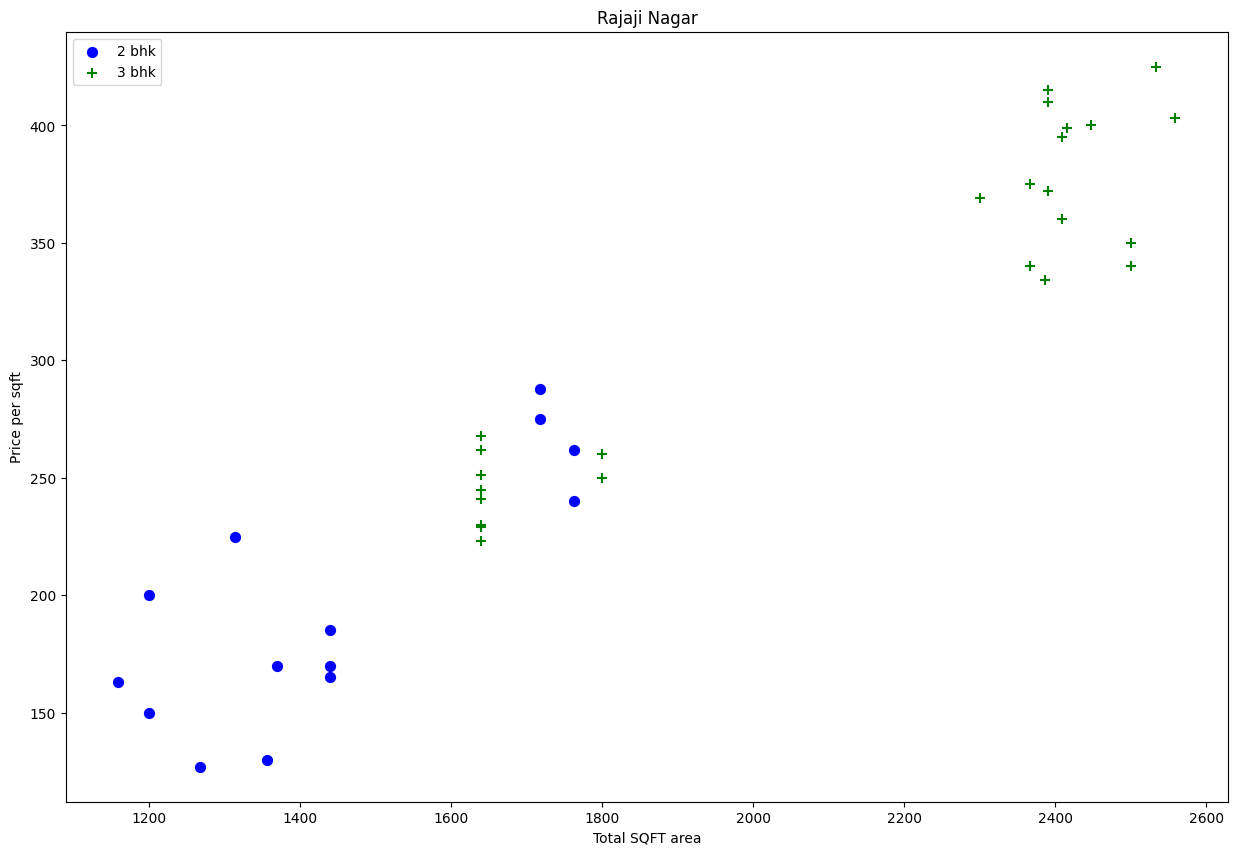

In [24]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

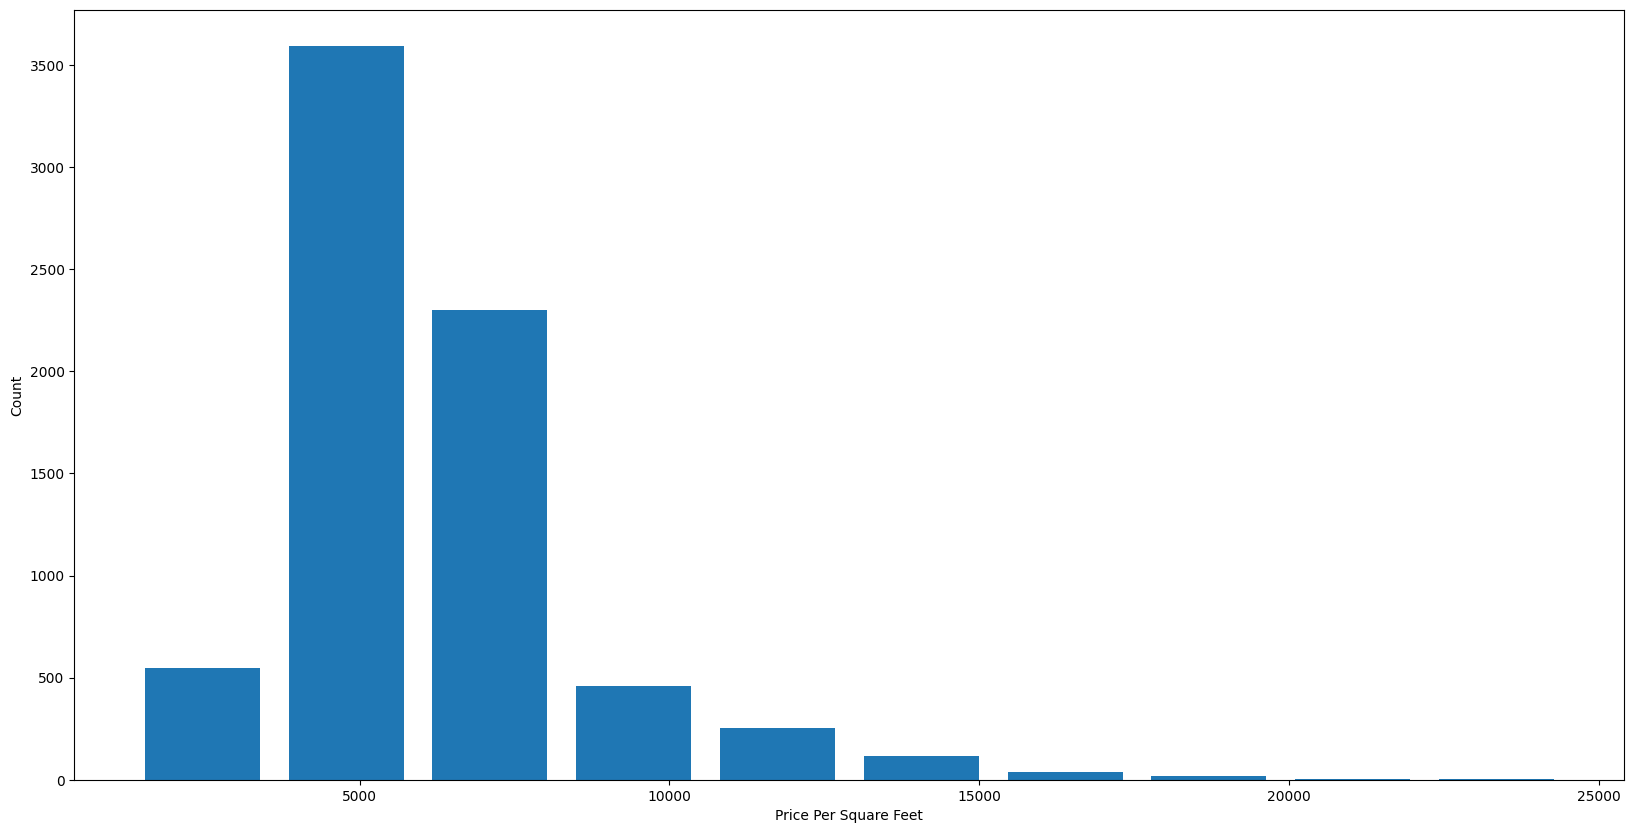

In [25]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

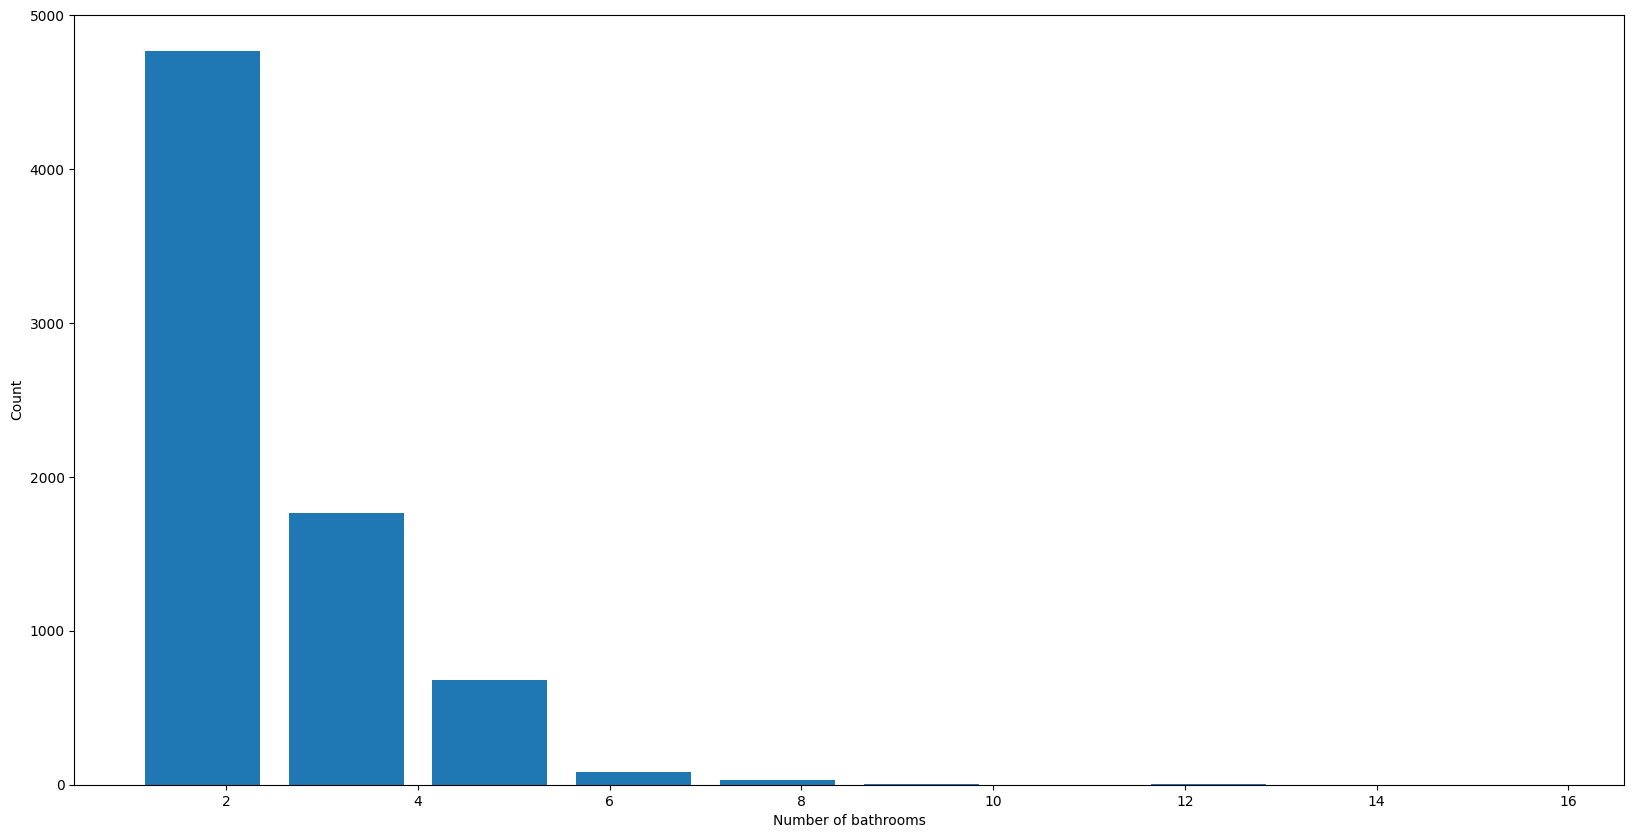

In [26]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [27]:
df8 = df7[df7['bath'] < df7['bhk']+2]
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [28]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


<!-- Model Building Section -->

<h2>Model Building</h2>
<p>
    In this section, we will build and evaluate multiple machine learning models to predict house prices in Bengaluru. The goal is to identify the best-performing model based on its predictive accuracy and robustness.
</p>
<p>
    The following models will be considered:
</p>
<ul>
    <li><strong>Linear Regression</strong>: A fundamental regression technique that models the relationship between independent and dependent variables using a linear equation. This model serves as a baseline for comparison with more complex algorithms.</li>
    <li><strong>XGBoost</strong>: An advanced gradient boosting algorithm that is highly effective for regression and classification tasks. It optimizes performance through techniques such as parallel processing and regularization.</li>
    <li><strong>Gradient Boosting</strong>: A powerful ensemble learning method that builds models sequentially, each one correcting errors made by the previous models. It helps improve prediction accuracy significantly.</li>
</ul>
<p>
    To optimize the performance of these models, we will apply <strong>GridSearchCV</strong>, a technique for hyperparameter tuning that exhaustively searches through specified parameter values to identify the optimal configuration for each model. This process enhances model performance and ensures better generalization to unseen data.
</p>
<p>
    By evaluating the models' performance metrics, such as Mean Squared Error (MSE) and R-squared values, we can determine the most suitable algorithm for our house price prediction task.
</p>


In [29]:
dummies = pd.get_dummies(df9.location, dtype=float)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df10 = pd.concat([df9, dummies.drop('other', axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = df11.drop('price', axis='columns')
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y = df11.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

In [35]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression().fit(X_train,y_train)
print(lr_clf.score(X_test,y_test))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

0.8452277697874374


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [36]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=5).fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_test, y_pred))
print("R2 score : ",r2_score(y_test, y_pred))
cross_val_score(XGBRegressor(), X, y, cv=cv)

Mean Squared Error :  860.8997735543293
R2 score :  0.8298874468648256


array([0.80121089, 0.6784784 , 0.89002684, 0.86749401, 0.9065576 ])

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(
    n_estimators = 100, 
    max_depth= 5,
    learning_rate= 0.1
).fit(X_train, y_train)
y_pred=gdb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_test, y_pred))
print("R2 score : ",r2_score(y_test, y_pred))
cross_val_score(XGBRegressor(), X, y, cv=cv)

Mean Squared Error :  896.3688380733873
R2 score :  0.8228788108911604


array([0.80121089, 0.6784784 , 0.89002684, 0.86749401, 0.9065576 ])

In [38]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor

# def find_best_model(X, y):
#     algos = {
#     'linear_regression': {
#         'model': LinearRegression(),
#         'params': {}
#     },
#     'decision_tree': {
#         'model': DecisionTreeRegressor(),
#         'params': {
#             'criterion': ['mse', 'friedman_mse'],
#             'splitter': ['best', 'random']
#         }
#     },
#     'GradientBoosting': {
#         'model': GradientBoostingRegressor(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 4, 5]
#         }
#     },
#     'xgboost': {
#         'model': XGBRegressor(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 4, 5]
#         }
#     }
# }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, algo_info in algos.items():
#         gs =  GridSearchCV(algo_info['model'], algo_info['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })
#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model(X,y)

In [39]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    # print(x)
    return xgboost.predict([x])[0]

In [1]:
predict_price('banaswadi', 1570, 2, 2)

NameError: name 'predict_price' is not defined

<!-- Model Export Section -->

<h2>Exporting the Model</h2>
<p>
    Once we have trained and evaluated our machine learning model, the next step is to export it for future use. By saving the model, we can easily load it later for making predictions without needing to retrain it each time.
</p>
<p>
    In this section, we will use the <strong>Pickle</strong> library to serialize and export the trained model to a file. This process involves:
</p>
<ul>
    <li><strong>Importing the Pickle Library</strong>: Utilizing the Pickle library, which allows us to convert Python objects into a byte stream for easy storage.</li>
    <li><strong>Saving the Model</strong>: Using the <code>pickle.dump()</code> function to write the serialized model to a .pkl file. This file can be stored securely and reused as needed.</li>
    <li><strong>Loading the Model</strong>: Demonstrating how to load the saved model back into the environment using <code>pickle.load()</code>, enabling us to make predictions on new data.</li>
</ul>
<p>
    Exporting the model not only streamlines the prediction process but also ensures that the trained model can be shared with others or deployed in a production environment.
</p>


In [41]:
# import pickle
# with open('bengaluru_house_price_model.pkl', 'wb') as f:
#     pickle.dump(xgboost, f)

In [42]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))

<!-- Conclusion Section -->

<h2>Conclusion</h2>
<p>
    In this project, we developed a robust house price prediction model for Bengaluru, leveraging various machine learning techniques to achieve accurate results. Through a systematic approach, we addressed critical phases including data collection, cleaning, feature engineering, model selection, and evaluation.
</p>
<p>
    Our analysis demonstrated that different models, such as Linear Regression, XGBoost, and Gradient Boosting, each brought unique strengths to the table. By employing GridSearchCV for hyperparameter tuning, we optimized model performance, ensuring that the selected model not only fits the training data well but also generalizes effectively to unseen data.
</p>
<p>
    The final model achieved promising performance metrics, reflecting its potential utility for real estate stakeholders in Bengaluru. With this tool, buyers can make informed decisions, sellers can set competitive prices, and real estate professionals can gain valuable insights into market trends.
</p>
<p>
    Future work could explore the integration of additional features, such as socio-economic indicators or nearby amenities, to further enhance prediction accuracy. Additionally, deploying the model as a web application could provide users with an interactive platform to estimate property prices based on their specific criteria.
</p>
<p>
    Overall, this project not only highlights the power of machine learning in addressing real-world problems but also serves as a stepping stone for further exploration in predictive analytics within the real estate domain.
</p>
